Environment setup

In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image

from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

path = '/content/drive/MyDrive/PHYS3153 O6/Dataset shift/'

Mounted at /content/drive/


Get the image data from google drive

In [2]:
name = ['Capture_0001.png','Capture_0002.png','Capture_0003.png','Capture_0004.png','Capture_0005.png','Capture_0006.png','Capture_0007.png','Capture_0008.png','Capture_0009.png','Capture_0010.png','Capture_0011.png','Capture_0012.png']
img= []
for i in range(12):
  img_path = os.path.join(path, name[i])
  temp = Image.open(img_path).convert('L')
  img.append(np.array(temp))



# Part 1:Use Kmeans clustering to find centroid point for each image

In [3]:
centroids = []
for i in range(12):
  threshold_value = 200
  binary_map = (img[i] > threshold_value).astype(int)

  bright_spots = np.argwhere(binary_map == 1)


  kmeans = KMeans(n_clusters=1, random_state=0).fit(bright_spots)

  centroids.append(kmeans.cluster_centers_[0])
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[array([ 410.96723925, 1145.69051766]), array([ 414.16975565, 1141.35841092]), array([ 411.69516885, 1139.20850966]), array([ 409.2245531 , 1141.52469748]), array([ 408.48594668, 1141.13911201]), array([ 408.0726662 , 1140.36771488]), array([ 406.74131386, 1140.08014407]), array([ 406.02573611, 1140.50254404]), array([ 399.30572767, 1147.59471654]), array([ 396.90751762, 1149.42750325]), array([ 395.88705261, 1150.65518651]), array([ 393.72374355, 1152.72655657])]


# Part 2: Use the fitted plot of frequency versus voltage to convert the data

In [4]:
voltage = np.array([11,13.8,15.6,18.1,19,21.1,23.1,25.9,26.2,28,28.9,31.7])
frequency = voltage*17.564 - 8.4014
print(frequency)

[184.8026 233.9818 265.597  309.507  325.3146 362.199  397.327  446.5062
 451.7754 483.3906 499.1982 548.3774]


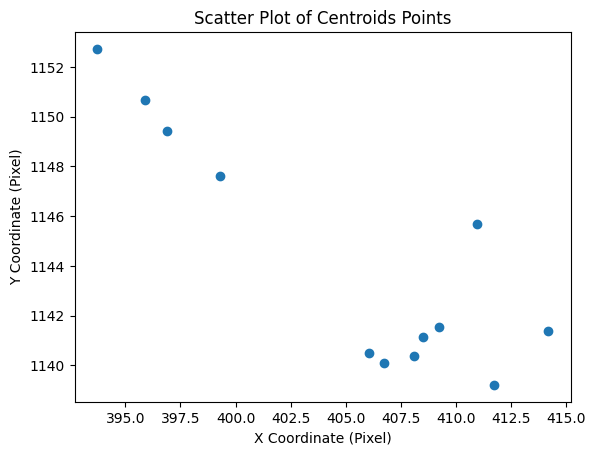

In [16]:
import matplotlib.pyplot as plt
centroids = np.array(centroids)

x_points = centroids[:, 0]
y_points = centroids[:, 1]

# Create a scatter plot
plt.scatter(x_points, y_points)

# Set the title and labels
plt.title('Scatter Plot of Centroids Points')
plt.xlabel('X Coordinate (Pixel)')
plt.ylabel('Y Coordinate (Pixel)')

# Show the plot
plt.show()

# Part 3: PCA method for dimension reduction & subtraction with the first data

In [6]:
origin = centroids[0]

# Translate the dataset so that the first data point is at the origin
translated_data = centroids - origin

# Since we want to fit the data into a 1D line, we can take the magnitude of each point
# from the origin to represent it on a 1D line.
result_1d_array = np.linalg.norm(translated_data, axis=1)

# The first data point is at the origin, so its magnitude is 0.
# We replace the first element with 0 to reflect this.
result_1d_array[0] = 0

# Print the resulting 1D array
print(result_1d_array)

[ 0.          5.38732402  6.52275319  4.51564091  5.18383123  6.05894237
  7.0238691   7.16474169 11.8159564  14.54788072 15.87639649 18.62374794]


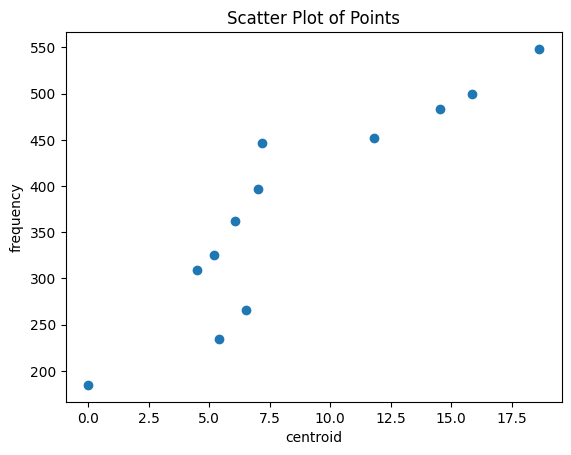

In [7]:
# Create a scatter plot
plt.scatter(result_1d_array, frequency)

# Set the title and labels
plt.title('Scatter Plot of Points')
plt.xlabel('centroid')
plt.ylabel('frequency')

# Show the plot
plt.show()

0.8916532485831754 0.03855629865128509


Text(0.5, 0.5, 'ΔS = 0.0386*Δf + 0.892')

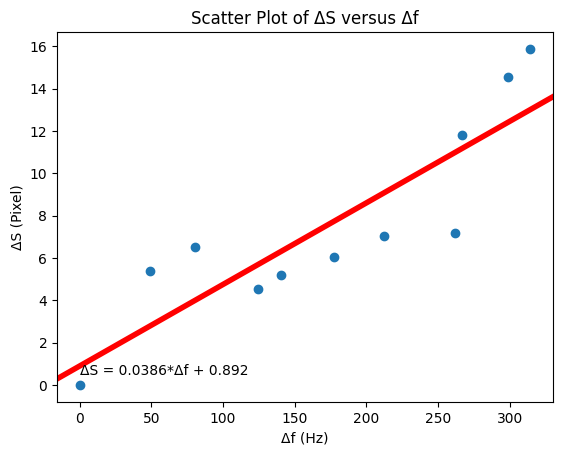

In [15]:
delta_s=[]
delta_f=[]
for i in range(11):
  delta_s.append(result_1d_array[i]-result_1d_array[0])
  delta_f.append(frequency[i]-frequency[0])
slope, y_int = np.polyfit(delta_f, delta_s, 1)
plt.scatter(delta_f, delta_s)
print(y_int,slope)
plt.title('Scatter Plot of ΔS versus Δf')
plt.xlabel('Δf (Hz)')
plt.ylabel('ΔS (Pixel)')
plt.axline((0, y_int), slope=slope,linewidth=4, color='r')
plt.text(0.5,0.5,'ΔS = 0.0386*Δf + 0.892')